CODE FOR FRAUD DETECTION PROJECT 

Dataset for fraud detection is the Synthetic Financial Datasets For Fraud Detection is available on Kaggle: https://www.kaggle.com/datasets/ealaxi/paysim1. This dataset contains a set of synthetic transactions, both fraudulent and non-fraudulent, with features such as transaction amount, time, and so on. **The general goal is to build a fraud detection model** that identifies potentially fraudulent transactions based on transaction type, amount, balance changes, and other features.


PART 1: DATA EXPLORATION 

Before analysing data, here is a breif explaination about the 11 atributes of the dataset
*   step: Integer value represents the unit of time in the simulation, where each step corresponds to one hour of simulation time.
*   type: Categorical variable representing the type of transaction, either "CASH-IN", "CASH-OUT", "DEBIT", "PAYMENT", or "TRANSFER".
*   amount: Continuous numerical value representing the amount of the transaction.
*   nameOrig: String value representing the ID of the customer who initiated the transaction.
*   oldbalanceOrg: Continuous numerical value representing the initial balance of the customer who initiated the transaction.
*   newbalanceOrig: Continuous numerical value representing the new balance of the customer who initiated the transaction after the transaction is completed.
*   nameDest: String value representing the ID of the customer who is the recipient of the transaction.
*   oldbalanceDest: Continuous numerical value representing the initial balance of the customer who is the recipient of the transaction.
*   newbalanceDest: Continuous numerical value representing the new balance of the customer who is the recipient of the transaction after the transaction is completed.
*   isFraud: Binary variable indicating whether the transaction is counterfeit (1) or not (0).
*   isFlaggedFraud: Binary variable indicating whether the transaction is flagged as counterfeit by the system (1) or not (0). This attribute is derived from the "type" and "amount" attributes.

















Let's load the neccessary library 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.cm as cm
from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,\
precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Advanced DA /Data/PS_20174392719_1491204439457_log.csv')

1.1 Summary Statistics of the dataset 

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.shape

(6362620, 11)

This dataset contains over 6 million records with 11 major attributes 

In [ ]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Luckily, there is 0 missing value in this dataset

a, Explore the fraud vs. valid transactions

In [ ]:
# Count the number of non-fraud and fraud transactions
num_non_fraud = len(df[df["isFraud"] == 0])
num_fraud = len(df[df["isFraud"] == 1])

# Print the results
print("Number of non-fraud transactions: ", num_non_fraud)
print("Number of fraud transactions: ", num_fraud)


Number of non-fraud transactions:  6354407
Number of fraud transactions:  8213


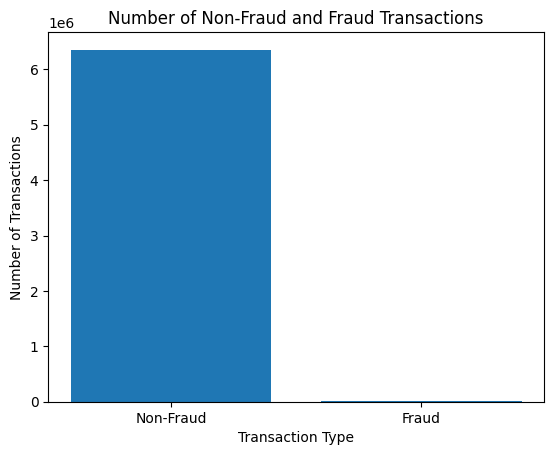

In [ ]:
# Visualize the results in a bar chart
labels = ["Non-Fraud", "Fraud"]
counts = [num_non_fraud, num_fraud]
plt.bar(labels, counts)
plt.title("Number of Non-Fraud and Fraud Transactions")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.show()

**First Insight:** Class Imbalance: The dataset has a highly imbalanced distribution of target variable classes. Only a small fraction of the transactions 8213 (0.13%) are fraudulent, while the vast majority 6354407 (99.87%) are not.


b, Explore the transaction type, compare the types in fraud and valid in fraud vs. valid trans

In [ ]:
print("Total transactions by type: \n",df.type.value_counts())

Total transactions by type: 
 CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In the next few code cells, I seek to compare valid transactions against fraud transactions instead of overall trends.

This is because I want to see patterns that differentiate fraud transactions from valid ones.

In [ ]:
# Subsetting data into observations with fraud and valid transactions:
fraud = df[df["isFraud"] == 1]
valid = df[df["isFraud"] == 0]

In [ ]:
print("Fraud transactions by type: \n",fraud.type.value_counts())
print("Valid transactions by type: \n",valid.type.value_counts())

Fraud transactions by type: 
 CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64
Valid transactions by type: 
 CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
Name: type, dtype: int64


**Second Insight:** There are five types of transactions in the dataset: CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER. Most of the transactions are either CASH-IN or CASH-OUT, while DEBIT and PAYMENT transactions are relatively rare. TRANSFER transactions are the least frequent type of transaction, but they are overrepresented among fraudulent transactions.


From the dataset, it seems that fraud transactions only occur when the transaction type is CASH_OUT or TRANSFER.

Since I do not have access to the population, I will assume that transaction only occur when transaction type is either CASH_OUT or TRANSFER

In [ ]:
valid = valid[(valid["type"] == "CASH_OUT")| (valid["type"] == "TRANSFER")]
df = df[(df["type"] == "CASH_OUT") | (df["type"] == "TRANSFER")]

3, Explore the transaction amount 

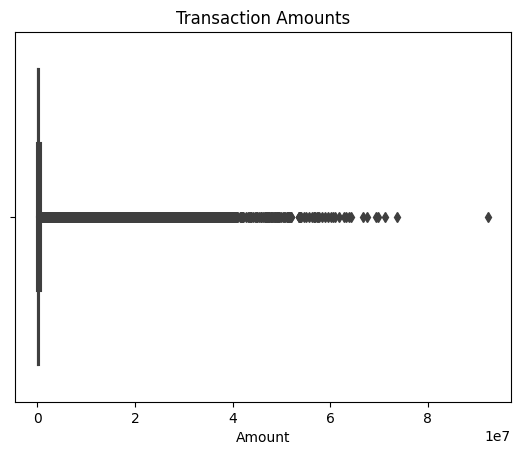

In [ ]:
# Create the boxplot for total transactions amount to dectect skewness and outliers 
sns.boxplot(x=df['amount'])
plt.title("Transaction Amounts")
plt.xlabel("Amount")
plt.show()

In [ ]:
#compare the median of the transaction amount for fraud and valid 
# Calculate the median
median_amount_fraud = np.median(fraud['amount'])
median_amount_valid = np.median(valid['amount'])
# Print the result
print("Median transaction amount for fraud transaction: $", median_amount_fraud)
print("Median transaction amount for valid transaction: $", median_amount_valid)

Median transaction amount for fraud transaction: $ 441423.44
Median transaction amount for valid transaction: $ 171034.46000000002


**Third Insight:** The distribution of transaction amounts is highly skewed, with most transactions being small and only a few transactions being very large. Fraudulent transactions tend to be larger than non-fraudulent transactions, with a larger median.

4, The correlation between initial and new balance

In [ ]:
# Select initial and new balance columns for senders 
initial_balance = df["oldbalanceOrg"]
new_balance = df["newbalanceOrig"]

# Calculate the correlation coefficient
corr_coeff = np.corrcoef(initial_balance, new_balance)[0][1]

# Print the result
print("For senders, correlation coefficient between initial and new balance:", corr_coeff)

For senders, correlation coefficient between initial and new balance: 0.7788262411175111


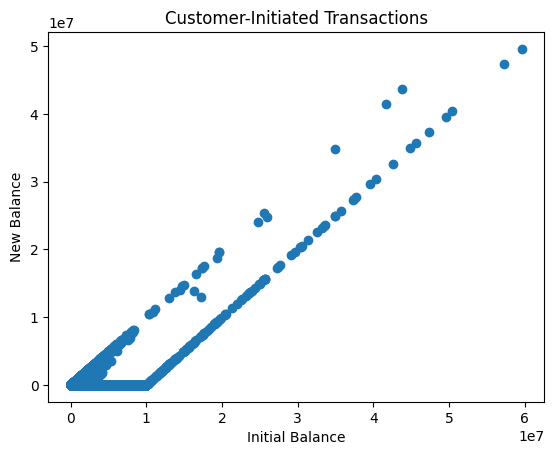

In [ ]:
# Create scatter plot for customer-initiated transactions
plt.scatter(initial_balance, new_balance)
plt.title("Customer-Initiated Transactions")
plt.xlabel("Initial Balance")
plt.ylabel("New Balance")
plt.show()

In [ ]:
# Select initial and new balance columns for recipients 
initial_balance2 = df["oldbalanceDest"]
new_balance2 = df["newbalanceDest"]

# Calculate the correlation coefficient
corr_coeff2 = np.corrcoef(initial_balance2, new_balance2)[0][1]

# Print the result
print("For recipients, correlation coefficient between initial and new balance:", corr_coeff2)

For recipients, correlation coefficient between initial and new balance: 0.9700604740242371


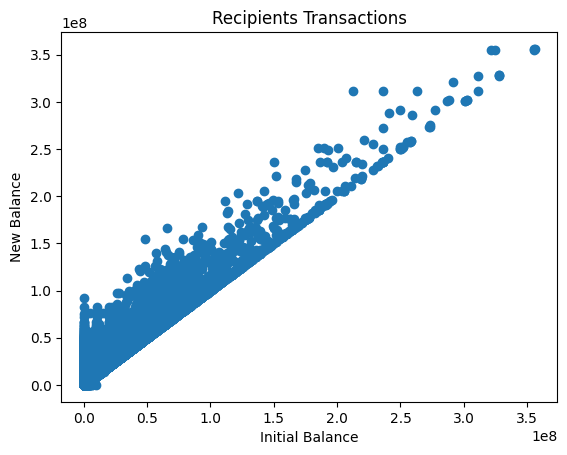

In [ ]:
# Create scatter plot for recipients transactions
plt.scatter(initial_balance2, new_balance2)
plt.title("Recipients Transactions")
plt.xlabel("Initial Balance")
plt.ylabel("New Balance")
plt.show()

**Fourth Insight**: The initial and new balances of customers who receive the transactions are positively correlated, indicating that customers tend to receive similar amounts of money to their increased balance (corr. coef = 0.97). However, the initial and new balances of customers who initiate the transactions are not as strongly correlated (corr. coef = 0.77), suggesting that senders may deposit or withdraw different amounts of money.


5. The number of Flagged Fraud transactions 

In [ ]:
# Count the number of flagged fraud
num_fraud = df[df['isFlaggedFraud'] == 1]['isFlaggedFraud'].count()

# Print the result
print('Number of flagged fraud:', num_fraud)

Number of flagged fraud: 16


**Fifth Insight**: There are only 16 instances of transactions that are flagged as fraudulent by the system, and all of them are also labeled as fraudulent in the dataset. However, there are many instances of fraudulent transactions that are not flagged, indicating that the system is not very effective at detecting fraudulent transactions.


PART 2: DATA PREPARATION 

a. Handling Categorical Variables 

In [ ]:
# getting one-hot encoding of the 'type' variable
df = pd.get_dummies(df, columns=['type'])

In [ ]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_TRANSFER
2,1,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,0,1
3,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,1,0
15,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,1,0
19,1,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,0,1
24,1,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,0,1


b. Create a feature of Time 

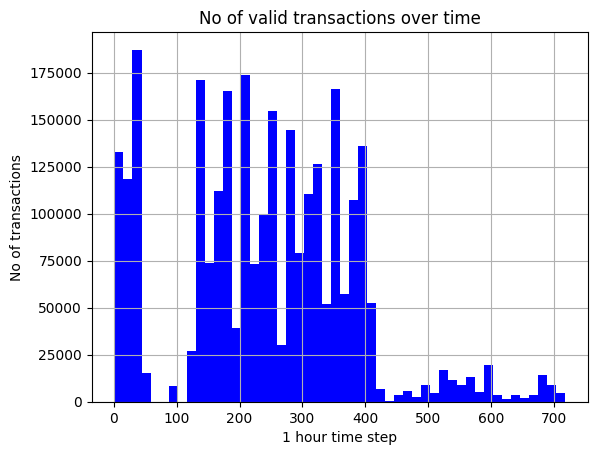

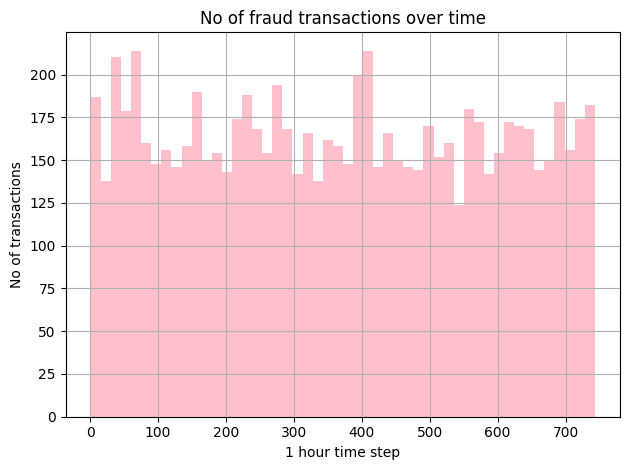

In [ ]:
bins = 50

valid.hist(column="step",color="blue",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("No of transactions")
plt.title("No of valid transactions over time")

fraud.hist(column ="step",color="pink",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("No of transactions")
plt.title("No of fraud transactions over time")

plt.tight_layout()
plt.show()

There are stark difference between the step data between valid and fraud transactions.

A large proportion of valid transactions occur between around the 0th and 60th timestep as well as the 110th and 410th time-steps.
The frequency at which fraudulent transactions occur does not seem to change much over time.
However the visualizations showcase the number of transactions for each time step over the course of a month.

Let's see what the patterns look like over any particular, day of the week or hour of the day.

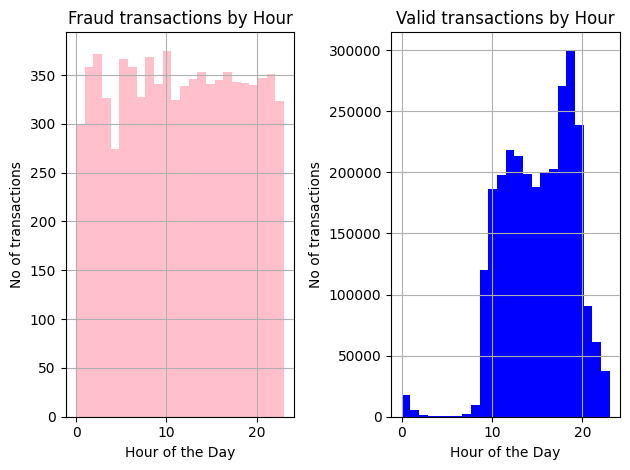

In [ ]:
# getting hours
num_hours = 24
fraud_hours = fraud.step % num_hours
valid_hours = valid.step % num_hours

plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="pink")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("No of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="blue")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("No of transactions")

plt.tight_layout()
plt.show()


Note: With respect to days, hour 0 does not necessarily mean 1am in the morning.

E.g If hour 0 is 9am, then hour 1 is 10 am, hour 2 is 11am and so on...

From the graphs above, there is strong evidence to suggest that from hour 0 to hour 9 (inclusive) valid transactions very seldom occur. On the other hand, fraudulent transactions still occur at similar rates to any hour of the day outside of hours 0 to 9 (inclusive).

In response to this, I will create another feature HourOfDay, which is the step column with each number taken to modulo 24.

In [ ]:
df = df.copy()


# adding feature HourOfDay to Dataset1 
df["HourOfDay"] = np.nan # initializing feature column
df.HourOfDay = df.step % 24


print("Head of dataset1: \n", pd.DataFrame.head(df))

Head of dataset1: 
     step     amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
2      1     181.00  C1305486145          181.0             0.0   C553264065   
3      1     181.00   C840083671          181.0             0.0    C38997010   
15     1  229133.94   C905080434        15325.0             0.0   C476402209   
19     1  215310.30  C1670993182          705.0             0.0  C1100439041   
24     1  311685.89  C1984094095        10835.0             0.0   C932583850   

    oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  \
2              0.0            0.00        1               0              0   
3          21182.0            0.00        1               0              1   
15          5083.0        51513.44        0               0              1   
19         22425.0            0.00        0               0              0   
24          6267.0      2719172.89        0               0              0   

    type_TRANSFER  HourOfDay  

c. Drop unnessary cols

In [ ]:
df.drop(['nameDest', 'nameOrig'], axis=1, inplace=True)


In [ ]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_TRANSFER,HourOfDay
2,1,181.00,181.0,0.0,0.0,0.00,1,0,0,1,1
3,1,181.00,181.0,0.0,21182.0,0.00,1,0,1,0,1
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,0,1,0,1
19,1,215310.30,705.0,0.0,22425.0,0.00,0,0,0,1,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,0,1,1


d. Deal with data imbalance 

Here, we deal with the problem of the imbalance data of the target variable 

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate the features and target variables
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Instantiate the SMOTE algorithm
smote = SMOTE()

# Perform oversampling on the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print('Original class distribution:', y.value_counts())
print('Resampled class distribution:', y_resampled.value_counts())


Original class distribution: 0    2762196
1       8213
Name: isFraud, dtype: int64
Resampled class distribution: 1    2762196
0    2762196
Name: isFraud, dtype: int64


e. Split and standardizing the data 

We will do this to standardize the data without standardizing the target variable isFraud.

Additionally, we will also split the data up into training sets and testing sets: 75% of the data is used as the training set, 25% is used as the testing set.

In [ ]:
# Setting random_state and seed so that the training/testing splits and model results are reproducible
RandomState = 42
seed(21)


# 42 is used often due to Hitchhiker's Guide to the Galaxy, I will use a number that a far smaller group may understand.
# Not that the actual number doesn't matter and is only used to make sure results are reproducible.
# creating training and testing sets
X = df.drop("isFraud",1)
y = df.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y)
    
# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

PART 3: MODEL SELECTION AND ANALYSIS

A. Random Forest

In [ ]:
# Train model
parametersRF = {'n_estimators':15,'oob_score':True,'class_weight': "balanced",'n_jobs':-1,\
                 'random_state':RandomState}
RF = RandomForestClassifier(**parametersRF)
fitted_vals = RF.fit(X_train, y_train)
 
# Predict on testing set
predictionsRF = RF.predict(X_test)
 
     
# Evaluating model
CM_RF = confusion_matrix(y_test,predictionsRF)
CR_RF = classification_report(y_test,predictionsRF)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, predictionsRF)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"Confusion Matrix":CM_RF,"Classification Report":CR_RF,"Area Under Curve":AUC_RF}
# showing results from Random Forest

for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

Confusion Matrix : 
 [[690486     34]
 [   374   1709]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    690520
           1       0.98      0.82      0.89      2083

    accuracy                           1.00    692603
   macro avg       0.99      0.91      0.95    692603
weighted avg       1.00      1.00      1.00    692603

Area Under Curve : 
 0.9102010169741622


The result show a great prediction for fraud transaction with the precision score for class 1 being .98 
Let's look at other model to see if we can improve the accuracy 

B. XGB trees 

In [ ]:
# Train model
weights = (y == 0).sum() / (1.0 * (y == 1).sum()) # for unbalanced datasets, these weights are recommended
parametersXGB = {'max_depth':3,'scale_pos_weight': weights,'n_jobs':-1,\
                 'random_state':RandomState,'learning_rate':0.1}
XGB = XGBClassifier(**parametersXGB)
    
fitted_vals = XGB.fit(X_train, y_train)
 
# Predict on testing set
predictionsXGB = XGB.predict(X_test)
 
     
# Evaluating model
CM_XGB = confusion_matrix(y_test,predictionsXGB)
CR_XGB = classification_report(y_test,predictionsXGB)
fprXGB, recallXGB, thresholds_XGB = roc_curve(y_test, predictionsXGB)
AUC_XGB = auc(fprXGB, recallXGB)
resultsXGB = {"Confusion Matrix":CM_XGB,"Classification Report":CR_XGB,"Area Under Curve":AUC_XGB}
# showing results from Extreme Gradient Boosting
for measure in resultsXGB:
    print(measure,": \n",resultsXGB[measure],"\n")

Confusion Matrix : 
 [[677630  12890]
 [    18   2065]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    690520
           1       0.14      0.99      0.24      2083

    accuracy                           0.98    692603
   macro avg       0.57      0.99      0.62    692603
weighted avg       1.00      0.98      0.99    692603
 

Area Under Curve : 
 0.9863457629557403 



This XGB trees was insufficient in predicting fraud transaction since the precision score for class 1 is only 0.14

C. Artificial Neural Net 

In [ ]:
ncols = len(X.columns)
hidden_layers = (ncols,ncols,ncols)
max_iter = 1000
MLP = MLPClassifier(hidden_layer_sizes=hidden_layers,max_iter=1000,random_state=RandomState)

# training model
MLP.fit(X_train,y_train)
    
# evaluating model on how it performs on balanced datasets
predictionsMLP = MLP.predict(X_test)
CM_MLP = confusion_matrix(y_test,predictionsMLP)
CR_MLP = classification_report(y_test,predictionsMLP)
fprMLP, recallMLP, thresholdsMLP = roc_curve(y_test, predictionsMLP)
AUC_MLP = auc(fprMLP, recallMLP)
    
resultsMLP = {"Confusion Matrix":CM_MLP,"Classification Report":CR_MLP,"Area Under Curve":AUC_MLP}
# showing results from Multilayered perceptrons developed from each dataset
for measure in resultsMLP:
    print(measure,": \n",resultsMLP[measure])

Confusion Matrix : 
 [[690355    165]
 [   302   1781]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    690520
           1       0.92      0.86      0.88      2083

    accuracy                           1.00    692603
   macro avg       0.96      0.93      0.94    692603
weighted avg       1.00      1.00      1.00    692603

Area Under Curve : 
 0.9273889261660885


Compare to the random forest algorithm, the precision of ANN model is lower at just 0.92 for the fraud prediction. Despite the AUC of ANN model is slightly higher (0.927) comparing to that of RF model (0.910). But it is still relatively similar. 

**Thus, we could draw a conclusion that the model of Random Forest works best with detecting fraudulent transations among the 3 data mining algorithms.**

Finally, let's look at what feature are important for the analysis

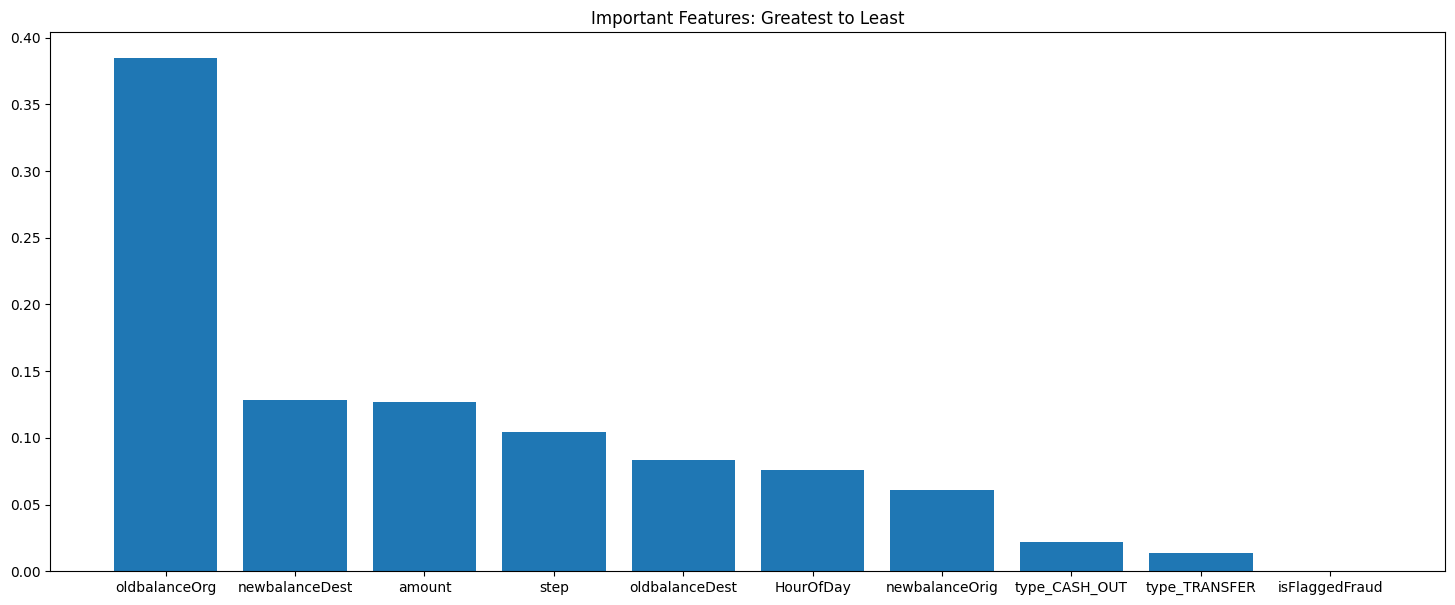

In [ ]:
x = np.arange(ncols)

# getting importances of features
importances = RF.feature_importances_

# getting the indices of the most important feature to least important
sort_ind = np.argsort(importances)[::-1]
plt.figure(figsize=(18,7))
plt.bar(x, importances[sort_ind])
plt.xticks(x,tuple(X.columns.values[sort_ind]))
plt.title("Important Features: Greatest to Least")
plt.show()

It seems that oldbalanceOrg ended by the most important feature by far for classifying transactions followed by newbalanceDest and amount.

So, we also propose a hypothesis: 

Null hypothesis: There is no relationship between the balance before the transaction and the likelihood of fraud.

Alternative hypothesis: Transactions with low balances before the transaction are more likely to be associated with fraud.

In [ ]:
from scipy.stats import ttest_ind

# Perform t-test to test this hypothesis
t, p = ttest_ind(fraud['oldbalanceOrg'], valid['oldbalanceOrg'])

# Print the t-test results
print("t-value: ", t)
print("p-value: ", p)


t-value:  617.0042758651445
p-value:  0.0


thus, we reject the null hypothesis and conclude that Transactions with low balances before the transaction are more likely to be associated with fraud. This is suitable with the feature importance showed above. 

---



That's the end of our analysis! 